In [3]:
#import all the all necessary libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
os.getcwd()

'/content'

# IEEE Credit card Transaction Data

In [ ]:
trn_idn_df1 = pd.read_csv('train_identity.csv')

In [ ]:
trn_idn_df1.shape

(144233, 41)

In [ ]:
#trn_idn_df1.head()

In [ ]:
 trn_txn_df2 = pd.read_csv('train_transaction.csv')

In [ ]:
trn_txn_df2.shape

(590540, 394)

In [ ]:
#trn_txn_df2.head()

In [ ]:
train_df = pd.merge(trn_txn_df2, trn_idn_df1, how='left',on='TransactionID')
print(train_df.shape)

(590540, 434)


In [ ]:
train_df.to_csv('iee_train.csv')

In [ ]:
del trn_idn_df1 , trn_txn_df2

In [ ]:
# Function to reduce memory of Data frame
def memor_reduce(df):

    start_mem = df.memory_usage(index=True, deep=True).sum() / 1024**2
    print(f'Initial memory usage of dataframe {start_mem:.2f} MB')
    
    for col in df.columns:
        col_type = df[col].dtype.name
        
        if col_type not in ['object', 'category']:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage(index=True, deep=True).sum() / 1024**2
    reduction = 100 * (start_mem - end_mem) / start_mem
    print(f'Memory usage after optimization: {end_mem:.2f} MB')
    print(f'Decreased by {reduction:.1f}%')
    
    return df


# Bank Fraud Data

In [5]:
 from google.colab import files


uploaded = files.upload()


Saving Bank_Fraud_1.csv to Bank_Fraud_1 (1).csv


In [6]:
import io
 
bn_fraud_1 = pd.read_csv(io.BytesIO(uploaded['Bank_Fraud_1.csv']))

In [7]:
#uploaded_1 = files.upload()

In [8]:
bn_fraud_1.head(), bn_fraud_1.shape

(   step       customer  age gender zipcodeOri       merchant zipMerchant  \
 0     0  'C1093826151'  '4'    'M'    '28007'   'M348934600'     '28007'   
 1     0   'C352968107'  '2'    'M'    '28007'   'M348934600'     '28007'   
 2     0  'C2054744914'  '4'    'F'    '28007'  'M1823072687'     '28007'   
 3     0  'C1760612790'  '3'    'M'    '28007'   'M348934600'     '28007'   
 4     0   'C757503768'  '5'    'M'    '28007'   'M348934600'     '28007'   
 
               category  amount  fraud  
 0  'es_transportation'    4.55      0  
 1  'es_transportation'   39.68      0  
 2  'es_transportation'   26.89      0  
 3  'es_transportation'   17.25      0  
 4  'es_transportation'   35.72      0  , (594643, 10))

In [9]:
bn_fraud_1.describe(include= 'all')

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
count,594643.000000,594643,594643,594643,594643,594643,594643,594643,594643.000000,594643.000000
unique,NaN,4112,8,4,1,50,1,15,NaN,NaN
top,NaN,'C1978250683','2','F','28007','M1823072687','28007','es_transportation',NaN,NaN
freq,NaN,265,187310,324565,594643,299693,594643,505119,NaN,NaN
mean,94.986827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.890135,0.012108
std,51.053632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.402831,0.109369
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.740000,0.000000
50%,97.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.900000,0.000000
75%,139.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.540000,0.000000


Remove zipcodeori & zipmerchant as it has one unique values 

In [10]:
bn_fraud_1.drop(['zipcodeOri','zipMerchant'], axis = 1, inplace=True)

Moving to next set of categorical variable like age , gender , category to understand about the data

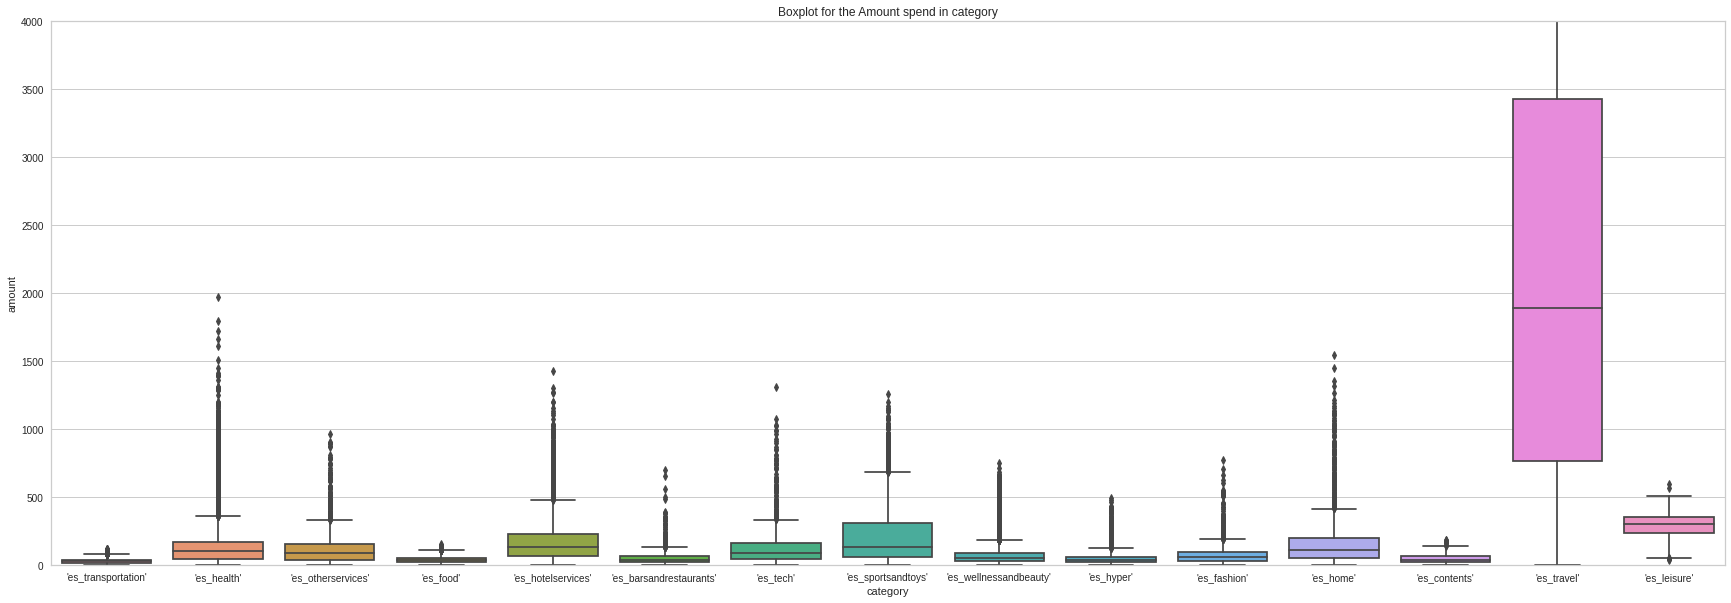

In [11]:
plt.figure(figsize=(30,10))
sns.boxplot(x=bn_fraud_1.category,y=bn_fraud_1.amount)
plt.title("Boxplot for the Amount spend in category")
plt.ylim(0,4000)
plt.show()

we can check by splitting fraud and  no fraud data to see how amount varies w.r.t category

In [12]:
fraud_dt = bn_fraud_1[bn_fraud_1['fraud']==1]
no_fraud_dt = bn_fraud_1[bn_fraud_1['fraud'] !=1]

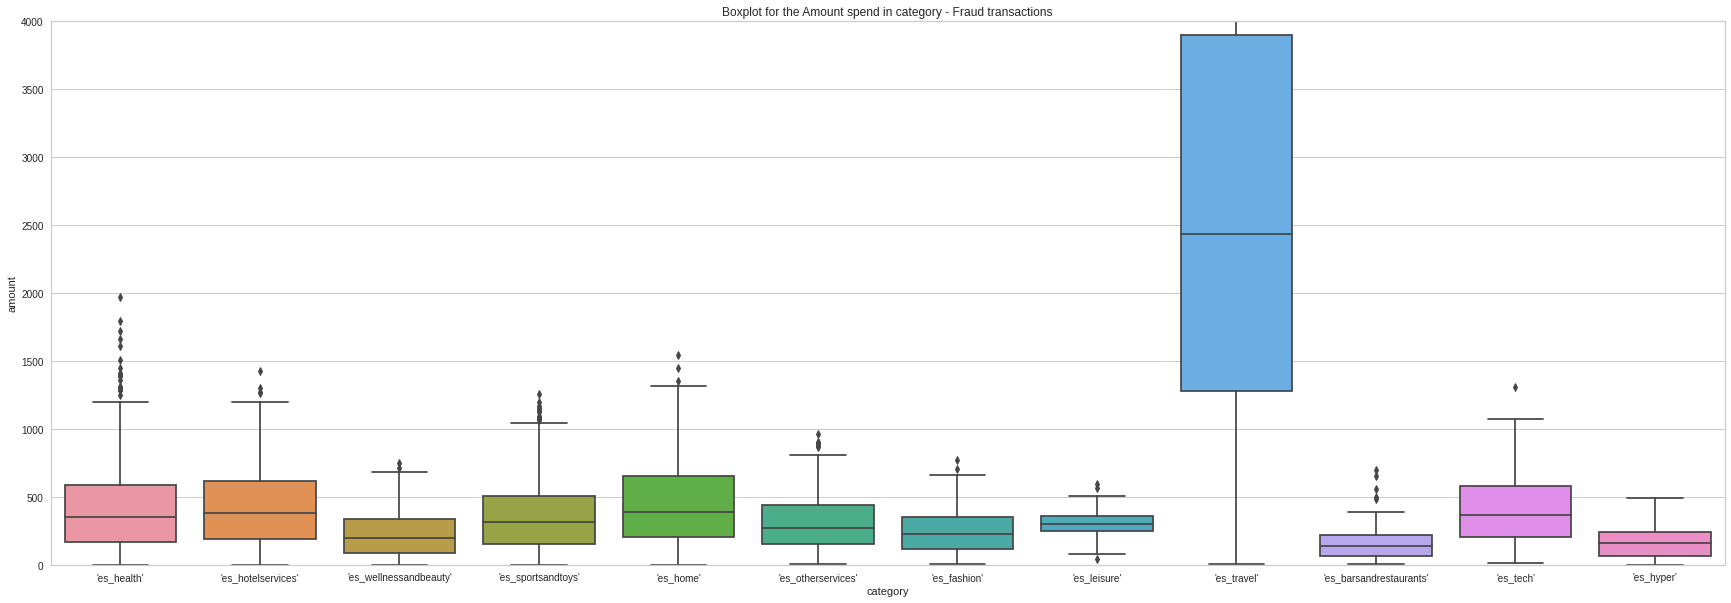

In [13]:
plt.figure(figsize=(30,10))
sns.boxplot(x=fraud_dt.category,y=fraud_dt.amount)
plt.title("Boxplot for the Amount spend in category - Fraud transactions")
plt.ylim(0,4000)
plt.show()

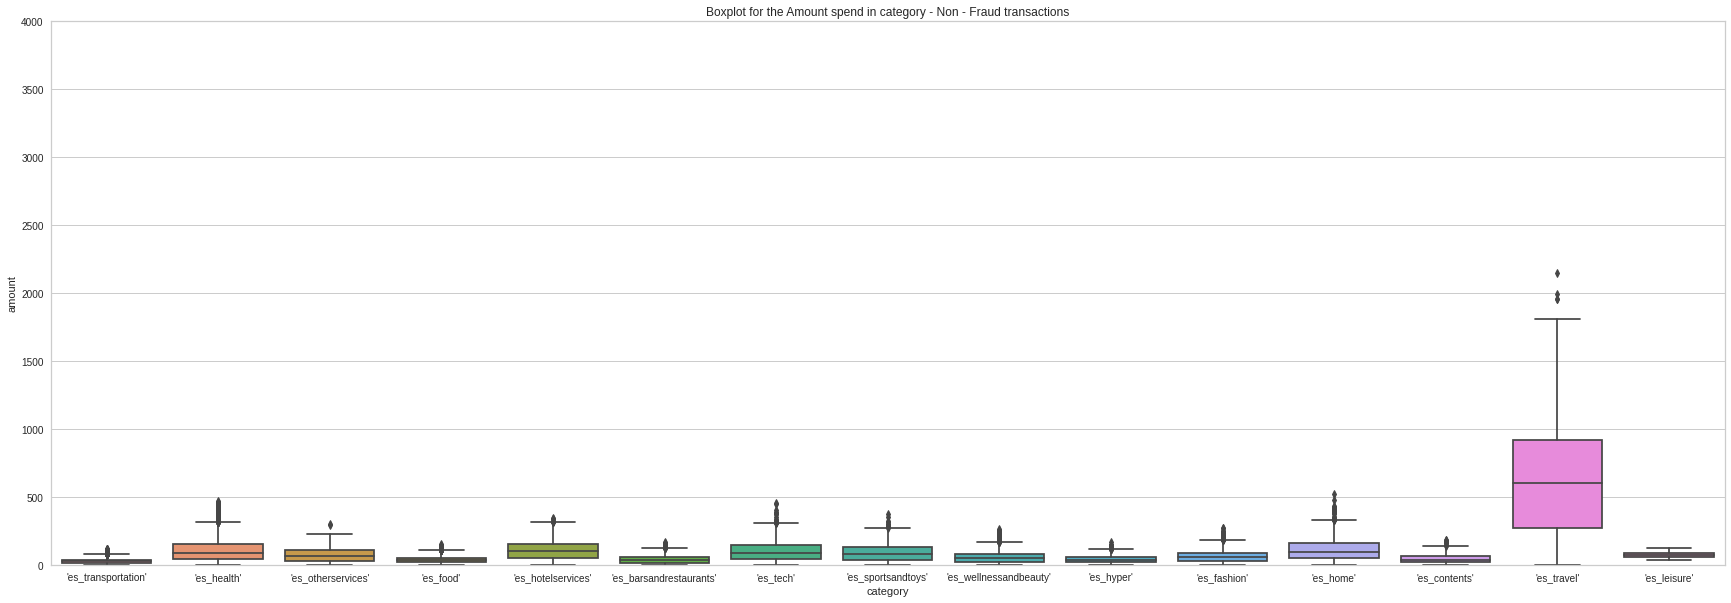

In [14]:
plt.figure(figsize=(30,10))
sns.boxplot(x=no_fraud_dt.category,y=no_fraud_dt.amount)
plt.title("Boxplot for the Amount spend in category - Non - Fraud transactions")
plt.ylim(0,4000)
plt.show()

clearly amound & category contributes in explaing the target variable.
Fraud related transaction has higher mean compared to non fraud related transction 

In [15]:
bn_fraud_1.age.unique()

array(["'4'", "'2'", "'3'", "'5'", "'1'", "'6'", "'U'", "'0'"],
      dtype=object)

In [16]:
bn_fraud_1.groupby('age')['fraud'].mean()*100

age
'0'    1.957586
'1'    1.185254
'2'    1.251401
'3'    1.192815
'4'    1.293281
'5'    1.095112
'6'    0.974826
'U'    0.594228
Name: fraud, dtype: float64

Lower the age higher the number Fraud transactions

In [17]:
#Final features
bn_fraud_1.columns

Index(['step', 'customer', 'age', 'gender', 'merchant', 'category', 'amount',
       'fraud'],
      dtype='object')

In [18]:

cate_col= bn_fraud_1.select_dtypes(include='object').columns

In [19]:
#converting object to categorical and encoding 
for x in cate_col:
    bn_fraud_1[x] =  bn_fraud_1[x].astype('category').cat.codes

In [20]:
bn_fraud_1.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0


Null check 

In [21]:
bn_fraud_1.isnull().sum()

step        0
customer    0
age         0
gender      0
merchant    0
category    0
amount      0
fraud       0
dtype: int64

No null values 

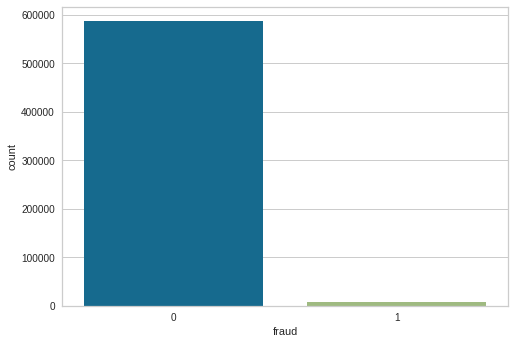

In [22]:
sns.countplot(bn_fraud_1['fraud'])
plt.show()

we have imbalance in target variable


Will use SMOTE upsampling technique to create synthetic data points

In [23]:

from imblearn.over_sampling import SMOTE

In [24]:
from sklearn.model_selection import train_test_split

In [1]:
from pycaret.classification import *

In [25]:
X = bn_fraud_1.drop(['fraud'],axis=1)
y = bn_fraud_1['fraud']

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.3)

In [50]:
test_dt = x_test.copy()
test_dt['fraud'] = y_test

In [51]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_train, y_train)
y_res = pd.DataFrame(y_res)

In [52]:
train_dt = X_res.copy()

In [53]:
train_dt['fraud'] = y_res

In [54]:
train_dt.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,113,526,5,1,18,12,8.91,0
1,143,1053,0,1,18,12,49.10,0
2,138,504,5,2,30,12,17.54,0
3,45,552,5,1,30,12,15.92,0
4,85,2019,5,1,18,12,46.09,0


In [55]:
test_dt.shape

(178393, 8)

In [56]:
exper = setup(data=train_dt, target=train_dt.columns[-1], html=False, silent=True, verbose=True,log_experiment = True, experiment_name = 'credit_card_fraud')

INFO:logs:PyCaret Supervised Module
INFO:logs:ML Usecase: classification
INFO:logs:version 2.3.10
INFO:logs:Initializing setup()
INFO:logs:setup(target=fraud, ml_usecase=classification, available_plots={'parameter': 'Hyperparameters', 'auc': 'AUC', 'confusion_matrix': 'Confusion Matrix', 'threshold': 'Threshold', 'pr': 'Precision Recall', 'error': 'Prediction Error', 'class_report': 'Class Report', 'rfe': 'Feature Selection', 'learning': 'Learning Curve', 'manifold': 'Manifold Learning', 'calibration': 'Calibration Curve', 'vc': 'Validation Curve', 'dimension': 'Dimensions', 'feature': 'Feature Importance', 'feature_all': 'Feature Importance (All)', 'boundary': 'Decision Boundary', 'lift': 'Lift Chart', 'gain': 'Gain Chart', 'tree': 'Decision Tree', 'ks': 'KS Statistic Plot'}, train_size=0.7, test_data=None, preprocess=True, imputation_type=simple, iterative_imputation_iters=5, categorical_features=None, categorical_imputation=constant, categorical_iterative_imputer=lightgbm, ordinal_f

Setup Succesfully Completed!


,Description,Value
0,session_id,3826
1,Target,fraud
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(822320, 8)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:Logging experiment in MLFlow
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='fraud',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthr

In [ ]:
best = compare_models( n_select = 5 )

INFO:logs:Initializing compare_models()
INFO:logs:compare_models(include=None, fold=None, round=4, cross_validation=True, sort=Accuracy, n_select=5, budget_time=None, turbo=True, errors=ignore, fit_kwargs=None, groups=None, experiment_custom_tags=None, probability_threshold=None, verbose=True, display=None, exclude=None)
INFO:logs:Checking exceptions
INFO:logs:Preparing display monitor
INFO:logs:Preparing display monitor
INFO:logs:Initializing Logistic Regression
INFO:logs:Total runtime is 3.524223963419596e-05 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=lr, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9226,0.9753,0.8943,0.9479,0.9203,0.8451,0.8465,7.495


INFO:logs:Initializing K Neighbors Classifier
INFO:logs:Total runtime is 1.253693135579427 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=knn, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fb61b0271d0>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:K Neighbors Classifier Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9817,0.9936,0.9960,0.9684,0.9820,0.9635,0.9639,4.517
lr,Logistic Regression,0.9226,0.9753,0.8943,0.9479,0.9203,0.8451,0.8465,7.495


INFO:logs:Initializing Naive Bayes
INFO:logs:Total runtime is 2.0111272891362506 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=nb, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fb61b0271d0>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Naive Bayes Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jo

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9817,0.9936,0.9960,0.9684,0.9820,0.9635,0.9639,4.517
lr,Logistic Regression,0.9226,0.9753,0.8943,0.9479,0.9203,0.8451,0.8465,7.495
nb,Naive Bayes,0.9166,0.9754,0.9053,0.9262,0.9156,0.8332,0.8334,0.344


INFO:logs:Initializing Decision Tree Classifier
INFO:logs:Total runtime is 2.0729445457458495 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=dt, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fb61b0271d0>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Decision Tree Classifier Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9930,0.9930,0.9951,0.9909,0.9930,0.9860,0.9860,2.679
knn,K Neighbors Classifier,0.9817,0.9936,0.9960,0.9684,0.9820,0.9635,0.9639,4.517
lr,Logistic Regression,0.9226,0.9753,0.8943,0.9479,0.9203,0.8451,0.8465,7.495
nb,Naive Bayes,0.9166,0.9754,0.9053,0.9262,0.9156,0.8332,0.8334,0.344


INFO:logs:Initializing SVM - Linear Kernel
INFO:logs:Total runtime is 2.5235686937967934 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=svm, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fb61b0271d0>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:SVM - Linear Kernel Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shu

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9930,0.9930,0.9951,0.9909,0.9930,0.9860,0.9860,2.679
knn,K Neighbors Classifier,0.9817,0.9936,0.9960,0.9684,0.9820,0.9635,0.9639,4.517
lr,Logistic Regression,0.9226,0.9753,0.8943,0.9479,0.9203,0.8451,0.8465,7.495
nb,Naive Bayes,0.9166,0.9754,0.9053,0.9262,0.9156,0.8332,0.8334,0.344
svm,SVM - Linear Kernel,0.8670,0.0000,0.8911,0.8667,0.8736,0.7341,0.7438,36.966


INFO:logs:Initializing Ridge Classifier
INFO:logs:Total runtime is 8.688847776254018 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=ridge, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fb61b0271d0>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Ridge Classifier Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9930,0.9930,0.9951,0.9909,0.9930,0.9860,0.9860,2.679
knn,K Neighbors Classifier,0.9817,0.9936,0.9960,0.9684,0.9820,0.9635,0.9639,4.517
lr,Logistic Regression,0.9226,0.9753,0.8943,0.9479,0.9203,0.8451,0.8465,7.495
nb,Naive Bayes,0.9166,0.9754,0.9053,0.9262,0.9156,0.8332,0.8334,0.344
ridge,Ridge Classifier,0.8671,0.0000,0.8358,0.8916,0.8628,0.7342,0.7357,0.358
svm,SVM - Linear Kernel,0.8670,0.0000,0.8911,0.8667,0.8736,0.7341,0.7438,36.966


INFO:logs:Initializing Random Forest Classifier
INFO:logs:Total runtime is 8.752888814608257 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=rf, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fb61b0271d0>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Random Forest Classifier Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=N

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9951,0.9998,0.9983,0.9919,0.9951,0.9901,0.9902,88.236
dt,Decision Tree Classifier,0.9930,0.9930,0.9951,0.9909,0.9930,0.9860,0.9860,2.679
knn,K Neighbors Classifier,0.9817,0.9936,0.9960,0.9684,0.9820,0.9635,0.9639,4.517
lr,Logistic Regression,0.9226,0.9753,0.8943,0.9479,0.9203,0.8451,0.8465,7.495
nb,Naive Bayes,0.9166,0.9754,0.9053,0.9262,0.9156,0.8332,0.8334,0.344
ridge,Ridge Classifier,0.8671,0.0000,0.8358,0.8916,0.8628,0.7342,0.7357,0.358
svm,SVM - Linear Kernel,0.8670,0.0000,0.8911,0.8667,0.8736,0.7341,0.7438,36.966


INFO:logs:Initializing Quadratic Discriminant Analysis
INFO:logs:Total runtime is 23.463571238517762 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=qda, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fb61b0271d0>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Quadratic Discriminant Analysis Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9951,0.9998,0.9983,0.9919,0.9951,0.9901,0.9902,88.236
dt,Decision Tree Classifier,0.9930,0.9930,0.9951,0.9909,0.9930,0.9860,0.9860,2.679
knn,K Neighbors Classifier,0.9817,0.9936,0.9960,0.9684,0.9820,0.9635,0.9639,4.517
lr,Logistic Regression,0.9226,0.9753,0.8943,0.9479,0.9203,0.8451,0.8465,7.495
nb,Naive Bayes,0.9166,0.9754,0.9053,0.9262,0.9156,0.8332,0.8334,0.344
qda,Quadratic Discriminant Analysis,0.9077,0.9759,0.8830,0.9288,0.9053,0.8153,0.8163,0.424
ridge,Ridge Classifier,0.8671,0.0000,0.8358,0.8916,0.8628,0.7342,0.7357,0.358
svm,SVM - Linear Kernel,0.8670,0.0000,0.8911,0.8667,0.8736,0.7341,0.7438,36.966


INFO:logs:Initializing Ada Boost Classifier
INFO:logs:Total runtime is 23.538755794366203 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=ada, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fb61b0271d0>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Ada Boost Classifier Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, s

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9951,0.9998,0.9983,0.9919,0.9951,0.9901,0.9902,88.236
dt,Decision Tree Classifier,0.9930,0.9930,0.9951,0.9909,0.9930,0.9860,0.9860,2.679
knn,K Neighbors Classifier,0.9817,0.9936,0.9960,0.9684,0.9820,0.9635,0.9639,4.517
ada,Ada Boost Classifier,0.9660,0.9947,0.9644,0.9675,0.9659,0.9320,0.9320,19.637
lr,Logistic Regression,0.9226,0.9753,0.8943,0.9479,0.9203,0.8451,0.8465,7.495
nb,Naive Bayes,0.9166,0.9754,0.9053,0.9262,0.9156,0.8332,0.8334,0.344
qda,Quadratic Discriminant Analysis,0.9077,0.9759,0.8830,0.9288,0.9053,0.8153,0.8163,0.424
ridge,Ridge Classifier,0.8671,0.0000,0.8358,0.8916,0.8628,0.7342,0.7357,0.358
svm,SVM - Linear Kernel,0.8670,0.0000,0.8911,0.8667,0.8736,0.7341,0.7438,36.966


INFO:logs:Initializing Gradient Boosting Classifier
INFO:logs:Total runtime is 26.816224034627282 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=gbc, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fb61b0271d0>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Gradient Boosting Classifier Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, rand

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9951,0.9998,0.9983,0.9919,0.9951,0.9901,0.9902,88.236
dt,Decision Tree Classifier,0.9930,0.9930,0.9951,0.9909,0.9930,0.9860,0.9860,2.679
knn,K Neighbors Classifier,0.9817,0.9936,0.9960,0.9684,0.9820,0.9635,0.9639,4.517
gbc,Gradient Boosting Classifier,0.9791,0.9972,0.9870,0.9716,0.9793,0.9582,0.9583,71.219
ada,Ada Boost Classifier,0.9660,0.9947,0.9644,0.9675,0.9659,0.9320,0.9320,19.637
lr,Logistic Regression,0.9226,0.9753,0.8943,0.9479,0.9203,0.8451,0.8465,7.495
nb,Naive Bayes,0.9166,0.9754,0.9053,0.9262,0.9156,0.8332,0.8334,0.344
qda,Quadratic Discriminant Analysis,0.9077,0.9759,0.8830,0.9288,0.9053,0.8153,0.8163,0.424
ridge,Ridge Classifier,0.8671,0.0000,0.8358,0.8916,0.8628,0.7342,0.7357,0.358
svm,SVM - Linear Kernel,0.8670,0.0000,0.8911,0.8667,0.8736,0.7341,0.7438,36.966


INFO:logs:Initializing Linear Discriminant Analysis
INFO:logs:Total runtime is 38.690772990385696 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=lda, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fb61b0271d0>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Linear Discriminant Analysis Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, rand

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9951,0.9998,0.9983,0.9919,0.9951,0.9901,0.9902,88.236
dt,Decision Tree Classifier,0.9930,0.9930,0.9951,0.9909,0.9930,0.9860,0.9860,2.679
knn,K Neighbors Classifier,0.9817,0.9936,0.9960,0.9684,0.9820,0.9635,0.9639,4.517
gbc,Gradient Boosting Classifier,0.9791,0.9972,0.9870,0.9716,0.9793,0.9582,0.9583,71.219
ada,Ada Boost Classifier,0.9660,0.9947,0.9644,0.9675,0.9659,0.9320,0.9320,19.637
lr,Logistic Regression,0.9226,0.9753,0.8943,0.9479,0.9203,0.8451,0.8465,7.495
nb,Naive Bayes,0.9166,0.9754,0.9053,0.9262,0.9156,0.8332,0.8334,0.344
qda,Quadratic Discriminant Analysis,0.9077,0.9759,0.8830,0.9288,0.9053,0.8153,0.8163,0.424
ridge,Ridge Classifier,0.8671,0.0000,0.8358,0.8916,0.8628,0.7342,0.7357,0.358
lda,Linear Discriminant Analysis,0.8671,0.9028,0.8358,0.8916,0.8628,0.7342,0.7357,0.865


INFO:logs:Initializing Extra Trees Classifier
INFO:logs:Total runtime is 38.839281562964125 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=et, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fb61b0271d0>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Extra Trees Classifier Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None

In [58]:
mymodel = finalize_model(best[0])

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=3826, verbose=0,
                     warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, m

In [59]:
prediction = predict_model(mymodel, data = test_dt)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=3826, verbose=0,
                     warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9927,0.9924,0.8464,0.6473,0.7336,0.73,0.7368


In [60]:
prediction.head()

,step,customer,age,gender,merchant,category,amount,fraud,Label,Score
79265,29,3116,3,1,22,9,21.87,0,0,0.69
162162,56,3609,1,1,18,12,44.16,0,0,1.00
23685,9,189,3,2,30,12,53.52,0,0,1.00
104755,38,3301,3,1,30,12,38.09,0,0,1.00
551595,168,1241,2,1,30,12,5.34,0,0,1.00


In [44]:
from sklearn import metrics

In [61]:
c_m = metrics.confusion_matrix(prediction['fraud'],prediction['Label'])

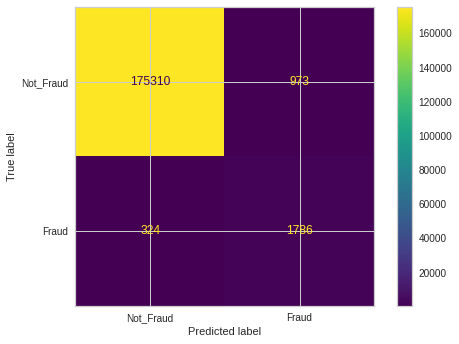

In [62]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_m, display_labels = ['Not_Fraud', 'Fraud'])

cm_display.plot()
plt.show()

In [ ]:
import shap

In [ ]:
save_model(mymodel, 'credit_card_model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=3514, verbose=0,
                     warm_start=False), model_name=credit_card_model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_featur

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='fraud',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nod

In [ ]:
saved_model = load_model('credit_card_model')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=credit_card_model, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [ ]:
train_pipe = saved_model[:-1].transform(X_res)

In [ ]:
explainer = shap.TreeExplainer(saved_model.named_steps["trained_model"])
# Calculate Shap values
shap_values = explainer.shap_values(train_pipe)